In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

In [17]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/kaggle/input/waste-classification-data/DATASET/TRAIN',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/kaggle/input/waste-classification-data/DATASET/TEST',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
# Creating the CNN Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
706/706 [==============================] - 112s 159ms/step - loss: 0.4319 - accuracy: 0.8112 - val_loss: 0.3203 - val_accuracy: 0.8782
Epoch 2/10
706/706 [==============================] - 112s 159ms/step - loss: 0.3674 - accuracy: 0.8441 - val_loss: 0.2888 - val_accuracy: 0.8886
Epoch 3/10
706/706 [==============================] - 112s 158ms/step - loss: 0.3464 - accuracy: 0.8521 - val_loss: 0.2962 - val_accuracy: 0.8842
Epoch 4/10
706/706 [==============================] - 112s 158ms/step - loss: 0.3327 - accuracy: 0.8604 - val_loss: 0.3344 - val_accuracy: 0.8854
Epoch 5/10
706/706 [==============================] - 112s 158ms/step - loss: 0.3176 - accuracy: 0.8691 - val_loss: 0.2648 - val_accuracy: 0.9001
Epoch 6/10
706/706 [==============================] - 113s 160ms/step - loss: 0.3073 - accuracy: 0.8730 - val_loss: 0.2926 - val_accuracy: 0.8902
Epoch 7/10
706/706 [==============================] - 111s 157ms/step - loss: 0.2959 - accuracy: 0.8796 - val_loss: 0.2715 -

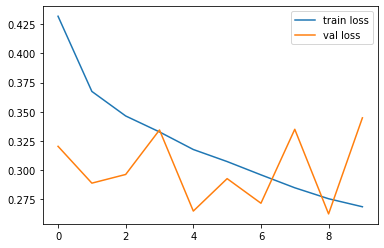

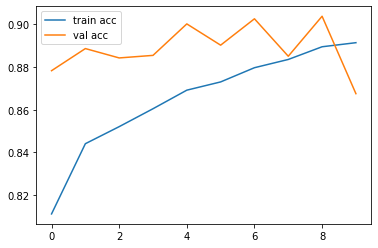

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend() 
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

cnn.save('model_init_2.h5')

In [55]:
from tensorflow import keras
model = keras.models.load_model('/kaggle/working/model_init_2.h5')

In [24]:
import numpy 
test_data='/kaggle/input/waste-classification-data/DATASET/TEST'
test_generator = test_datagen.flow_from_directory(test_data,target_size=(128,128),batch_size=32, class_mode='binary',shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
# print(predictions)
predicted_classes = numpy.round(predictions)

# print(predicted_classes)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

# print(true_classes)
print(class_labels)
# print(predicted_classes)

bin_pred_classes=[]
for i in range(0,len(predicted_classes)):
    #print(predicted_classes[i])
    if(predicted_classes[i]>0):
        bin_pred_classes.append(1) 
    else:
        bin_pred_classes.append(0) 
    

Found 2513 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


['O', 'R']


In [35]:
print(predicted_classes)

[[ 4.]
 [ 2.]
 [-7.]
 ...
 [10.]
 [ 4.]
 [ 5.]]


In [25]:
model.evaluate(test_generator)

79/79 [==============================] - 4s 50ms/step - loss: 3.2709 - accuracy: 0.4831


[3.270944595336914, 0.483087956905365]

In [26]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, bin_pred_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           O       0.61      0.20      0.30      1401
           R       0.45      0.84      0.59      1112

    accuracy                           0.48      2513
   macro avg       0.53      0.52      0.45      2513
weighted avg       0.54      0.48      0.43      2513



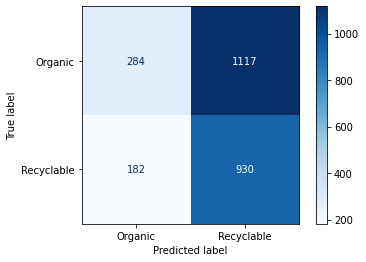

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes, bin_pred_classes)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Organic","Recyclable"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10028.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

[[6.092131]]


In [43]:
if result[0]>0:
    print("The image classified is Organic")
else:
    print("The image classified is Recyclable")

The image classified is Organic


## USE Transfer learning

In [45]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [46]:
x1=200;y1=200
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=20)
valid_datagen = image.ImageDataGenerator(rescale=1./255)

train_data_path='/kaggle/input/waste-classification-data/DATASET/TRAIN'
train_generator = train_datagen.flow_from_directory(train_data_path ,target_size=(x1,y1),batch_size=32,class_mode='binary')

val_data='/kaggle/input/waste-classification-data/DATASET/TEST'
validation_generator = valid_datagen.flow_from_directory(val_data,target_size=(x1,y1),batch_size=32, class_mode='binary')



model = tf.keras.Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

model.compile(optimizer='RMSprop', loss = 'binary_crossentropy', metrics = 'accuracy')

history = model.fit(train_generator,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = validation_generator,
validation_steps=8)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
8/8 [==============================] - 6s 510ms/step - loss: 0.6345 - accuracy: 0.6484 - val_loss: 0.6475 - val_accuracy: 0.6523
Epoch 2/15
8/8 [==============================] - 3s 428ms/step - loss: 0.4722 - accuracy: 0.7891 - val_loss: 0.5727 - val_accuracy: 0.6797
Epoch 3/15
8/8 [==============================] - 3s 412ms/step - loss: 0.4212 - accuracy: 0.8008 - val_loss: 0.4744 - val_accuracy: 0.7695
Epoch 4/15
8/8 [==============================] - 3s 397ms/step - loss: 0.3856 - accuracy: 0.8516 - val_loss: 0.4220 - val_accuracy: 0.8242
Epoch 5/15
8/8 [==============================] - 3s 402ms/step - loss: 0.3689 - accuracy: 0.8672 - val_loss: 0.3617 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 3s 402ms/step - loss: 0.3437 - accuracy: 0.8789 - val_loss: 0.3820 - val_accuracy: 0.8242
Epoch 7/15
8

In [47]:
model.evaluate(validation_generator)

79/79 [==============================] - 6s 75ms/step - loss: 0.3591 - accuracy: 0.8130


[0.35907092690467834, 0.8129725456237793]

In [49]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

79/79 [==============================] - 6s 66ms/step


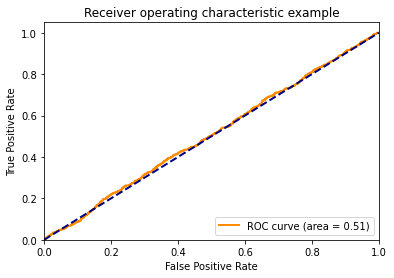

In [50]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [51]:
import numpy 
test_data='/kaggle/input/waste-classification-data/DATASET/TEST'
test_generator = valid_datagen.flow_from_directory(test_data,target_size=(x1,y1),batch_size=16, class_mode='binary',shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
# print(predictions)
predicted_classes = numpy.round(predictions)
# print(predicted_classes)

Found 2513 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [52]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

In [53]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

           O       0.76      0.97      0.85      1401
           R       0.95      0.61      0.74      1112

    accuracy                           0.81      2513
   macro avg       0.85      0.79      0.80      2513
weighted avg       0.84      0.81      0.80      2513



In [54]:
model.save("MobileNetv2.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
